In [ ]:
#This code is using a csv file to predict whether or not a customer will cancel based on a multitude of variables.
from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from dmba import plotDecisionTree, classificationSummary, regressionSummary


In [2]:
churn_df = pd.read_csv('Customers_Changed.csv')
churn_df = churn_df.drop(columns=['ID'])

In [3]:
churn_df

,Sex,Status,Children,Est_Income,Car_Owner,Usage,Age,RatePlan,LongDistance,International,Local,Dropped,Paymethod,LocalBilltype,LongDistanceBilltype,CHURN
0,1,0,1,38000.00,0,229.64,24.393333,3,23.56,0.00,206.08,0,1,1,1,Cancelled
1,0,1,2,29616.00,0,75.29,49.426667,2,29.78,0.00,45.50,0,2,0,0,Current
2,0,1,0,19732.80,0,47.25,50.673333,3,24.81,0.00,22.44,0,1,0,0,Current
3,0,0,2,96.33,0,59.01,56.473333,1,26.13,0.00,32.88,1,1,1,0,Current
4,1,1,2,52004.80,0,28.14,25.140000,1,5.03,0.00,23.11,0,2,1,1,Cancelled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,1,0,0,78851.30,0,29.04,48.373333,4,0.37,0.00,28.66,0,1,0,0,Cancelled
2066,1,0,1,17540.70,1,36.20,62.786667,1,22.17,0.57,13.45,0,3,1,0,Cancelled
2067,1,1,0,83891.90,1,74.40,61.020000,4,28.92,0.00,45.47,0,2,1,0,Cancelled
2068,1,1,2,28220.80,0,38.95,38.766667,4,26.49,0.00,12.46,0,1,0,0,Cancelled


Classes: Cancelled, Current


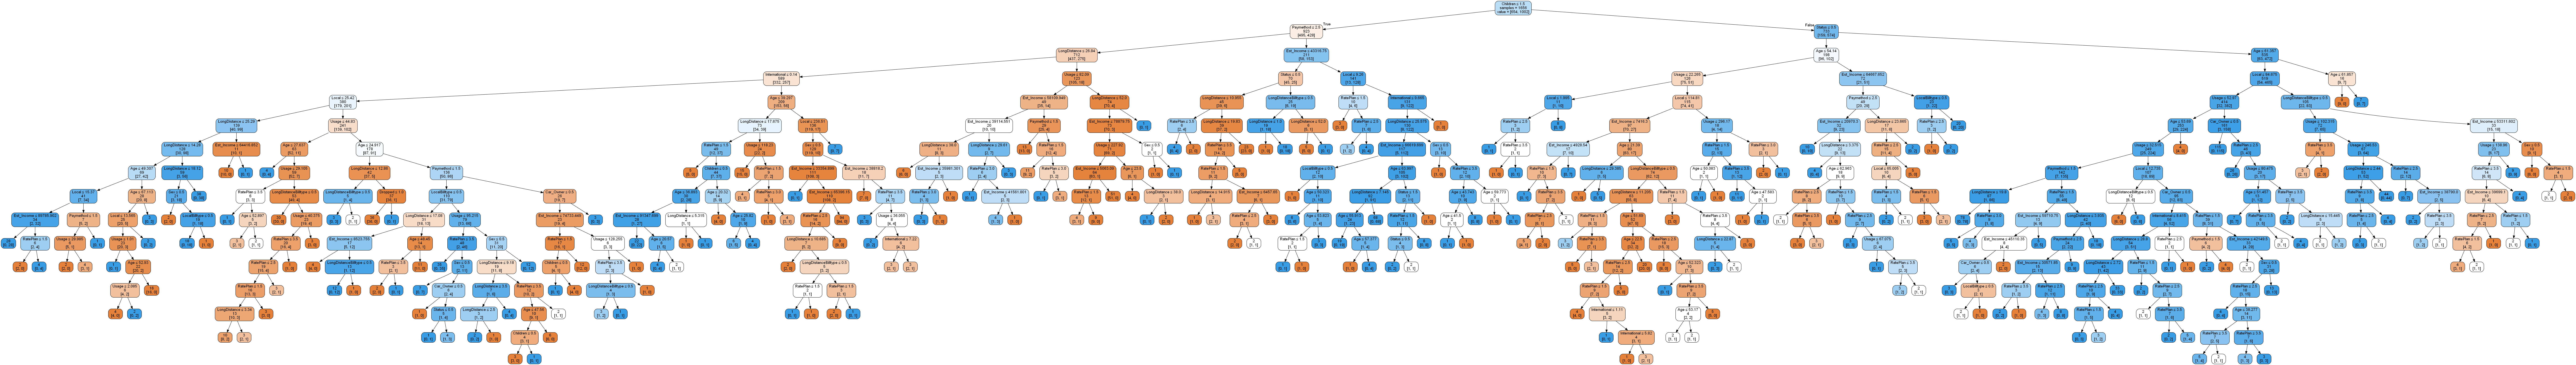

In [4]:


X = churn_df.drop(columns=['CHURN'])
y = churn_df['CHURN']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1)

fullClassTree = DecisionTreeClassifier()
fullClassTree.fit(train_X, train_y)

print("Classes: {}".format(', '.join(fullClassTree.classes_)))
plotDecisionTree(fullClassTree, feature_names=train_X.columns)

In [5]:
classificationSummary(train_y, fullClassTree.predict(train_X))
classificationSummary(valid_y, fullClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.9632)

       Prediction
Actual   0   1
     0 639  15
     1  46 956
Confusion Matrix (Accuracy 0.8382)

       Prediction
Actual   0   1
     0 130  20
     1  47 217
